In [1]:
import pandas as pd
import numpy as np

# Load your CSV data
input_file = 'Output10.csv'
data = pd.read_csv(input_file)

# Avoid first column for analysis
X = data.iloc[:, 0:]

data.head(4)

FileNotFoundError: [Errno 2] No such file or directory: 'Output10.csv'

In [ ]:
# Function to standardize the data
def standardize_data(data):
    # Calculate mean and standard deviation for each column
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    
    # Standardize the data
    X_standardized = (data - means) / stds
    
    return X_standardized, means, stds

# Standardize the data and get means and standard deviations
X_standardized, means, stds = standardize_data(data)

# Output CSV file path for standardized data
output_csv_file = 'standardised_data.csv'

# Write the standardized data to a new CSV file
X_standardized.to_csv(output_csv_file, index=False)
print("Standardized data saved to", output_csv_file)

# Output CSV file path for means and standard deviations
stats_output_csv_file = 'mean_std_dev.csv'

# Create a DataFrame for means and standard deviations
stats_df = pd.DataFrame({'Mean': means, 'Standard_Deviation': stds})

# Write means and standard deviations to a new CSV file
stats_df.to_csv(stats_output_csv_file)
print("Means and standard deviations saved to", stats_output_csv_file)


Standardized data saved to standardised_data.csv
Means and standard deviations saved to mean_std_dev.csv


In [ ]:
data.shape 

(108004, 10)

In [ ]:
X_standardized.head(4)

,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu
0,-2.040396,-2.181337,0.157837,-3.050846,-2.453660,0.157728,-1.26876,-1.728213,0.157782,-0.995242
1,-1.877725,-2.161332,0.196544,-3.050846,-2.426772,0.196419,-1.26876,-1.725994,0.157782,-0.995242
2,-1.877725,-2.143881,0.215898,-2.918055,-2.406119,0.215765,-1.26876,-1.724092,0.157782,-0.995242
3,-1.877725,-2.126855,0.215898,-2.918055,-2.385855,0.215765,-1.26876,-1.719337,0.177139,-0.995242


In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
cov_matrix.shape

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors and eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [ ]:
import pandas as pd

# Assuming principal_components is already defined
# Specify the number of principal components you want to keep
n_components = 6 # Adjust as needed

# Construct principal components
principal_components = eigenvectors[:, :n_components]

# Adjust n_components to match the actual number of columns in principal_components
# n_components = principal_components.shape[1]

# Create a DataFrame for the principal components
pc_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Specify the output CSV file path
output_file_path = 'pc_data.csv'

# Save the DataFrame to a CSV file
pc_data.to_csv(output_file_path, index=False)

# Print a message indicating the file save
print(f"Principal components data saved to {output_file_path}")


Principal components data saved to pc_data.csv


In [ ]:
# # Specify the number of principal components you want to keep
# n_components = 140  # Adjust as needed

# # Construct principal components
# principal_components = eigenvectors[:, :n_components]

In [ ]:
# # Plot the variance of the first 10 principal components
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), eigenvalues[:], marker='o')
# plt.title('Variance of First 10 Principal Components')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance')
# plt.grid(True)
# plt.show()

In [ ]:
# Project the original data onto the principal components
X_pca = np.dot(X_standardized, principal_components)

# Create a DataFrame for the compressed data
compressed_data = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Save the compressed data to a CSV file
output_file_path = 'pca_output.csv'
compressed_data.to_csv(output_file_path, index=False, float_format='%.4f')

print(f"Compressed data saved to {output_file_path}")         

Compressed data saved to pca_output.csv


In [ ]:
compressed_data.head(4) 

,PC1,PC2,PC3,PC4,PC5,PC6
0,5.166404,-0.123500,-1.250698,-1.280138,-0.027525,-0.006985
1,5.086201,-0.078092,-1.272732,-1.251593,0.111526,0.005104
2,5.023134,-0.043284,-1.246349,-1.150372,0.062772,0.015085
3,5.008337,-0.030279,-1.227579,-1.157900,0.064373,0.011317


In [ ]:
# import pandas as pd
# import numpy as np

# # >>>>>>>>>>>>>>  Reconstruct all columns from the compressed data  <<<<<<<<<<<<<<<<<
# # import files : pca_output, pc_data, mean.
# X_pca = pd.read_csv('pca_output.csv')
# principal_components = pd.read_csv('pc_data.csv')
# mean_std_dev_data = pd.read_csv('mean_std_dev.csv')

# reconstructed_data = np.dot(X_pca, principal_components.T)

# # Create a DataFrame for the reconstructed data
# reconstructed_df = pd.DataFrame(reconstructed_data, columns=X.columns)

# # Save the reconstructed data to a CSV file
# output_reconstructed_file_path = 'reconstructed_data.csv'
# reconstructed_df.to_csv(output_reconstructed_file_path, index=False, float_format='%.4f')

# print(f"Reconstructed data saved to {output_reconstructed_file_path}")

In [ ]:
# >>>>>>>>>>>>>>  Reconstruct all columns from the compressed data  <<<<<<<<<<<<<<<<<
# import files : pca_output, pc_data, mean.
X_pca = pd.read_csv('pca_output.csv')
principal_components = pd.read_csv('pc_data.csv')
mean_std_dev_data = pd.read_csv('mean_std_dev.csv')

import pandas as pd

# Step 1: Read the CSV file
input_file_path = 'mean_std_dev.csv' # Replace with your input file path
df = pd.read_csv(input_file_path)

first_column = df.iloc[:, 0]

# Step 3: Convert the column to a list of strings
# Since the first column contains the column names, you can directly convert it to a list of strings
column_names_list = first_column.tolist()

# new_df = pd.DataFrame(data, columns=column_names_list)

reconstructed_data = np.dot(X_pca, principal_components.T)

# Create a DataFrame for the reconstructed data
reconstructed_df = pd.DataFrame(reconstructed_data, columns=column_names_list)

# Save the reconstructed data to a CSV file
output_reconstructed_file_path = 'reconstructed_data.csv'
reconstructed_df.to_csv(output_reconstructed_file_path, index=False, float_format='%.4f')

print(f"Reconstructed data saved to {output_reconstructed_file_path}")

Reconstructed data saved to reconstructed_data.csv


In [ ]:
reconstructed_df.head(4)

,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu
0,-2.038617,-2.194839,0.159314,-3.053696,-2.439691,0.153525,-1.270782,-1.727988,0.160545,-0.992303
1,-1.877624,-2.160800,0.186583,-3.050693,-2.426569,0.178999,-1.271673,-1.726813,0.185112,-0.992273
2,-1.875936,-2.154712,0.198562,-2.920308,-2.394311,0.193583,-1.273913,-1.724358,0.197268,-0.989616
3,-1.875860,-2.137710,0.205122,-2.919646,-2.376959,0.199672,-1.272086,-1.715733,0.204002,-0.993766


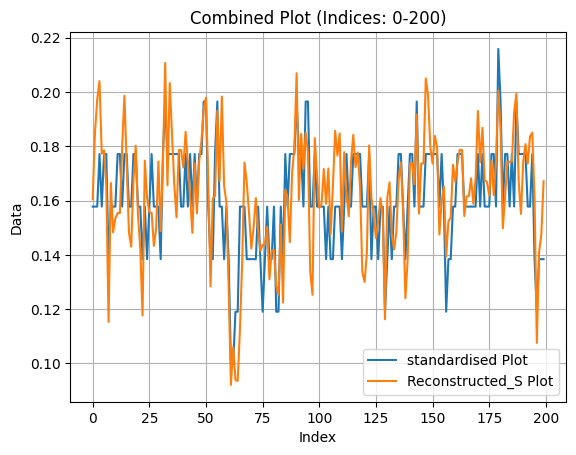

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file and select data points within a specific range
def load_and_select_data(file_path, column_index, start_index, end_index):
    reconstructed_column_data = pd.read_csv(file_path)
    data_from_column = reconstructed_column_data.iloc[:, column_index]
    return data_from_column[start_index:end_index]

# Define file paths
file_path_1 = 'standardised_data.csv'
file_path_2 = 'reconstructed_data.csv'

# Define the range of indices for the data points to be included in the plot
start_index = 0
end_index = 200                         

# Load and select data for the first plot
data_from_second_column_1 = load_and_select_data(file_path_1, 8, start_index, end_index)

# Load and select data for the second plot
data_from_second_column_2 = load_and_select_data(file_path_2, 8, start_index, end_index)

# Plot both sets of data on the same plot
plt.plot(data_from_second_column_1, label='standardised Plot')
plt.plot(data_from_second_column_2, label='Reconstructed_S Plot')
plt.title(f'Combined Plot (Indices: {start_index}-{end_index})')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.legend()  # Add legend to distinguish between the two plots
plt.show()

In [ ]:
import pandas as pd

# Function to reverse standardization
def reverse_standardization(reconstructed_data, means, stds):
    # Reverse the standardization
    original_data = (reconstructed_data * stds) + means
    return original_data

# Input CSV file paths
reconstructed_data_csv_file = 'reconstructed_data.csv'
# mean_std_dev_csv_file = 'mean_std_dev.csv'

# Read the standardized data from the CSV file
reconstructed_data = pd.read_csv(reconstructed_data_csv_file)

# Read means and standard deviations from the CSV file
# mean_std_dev_data = pd.read_csv(mean_std_dev_csv_file)

# Extract means and standard deviations
means = mean_std_dev_data['Mean'].values
stds = mean_std_dev_data['Standard_Deviation'].values

# Reverse the standardization to obtain the original data
original_data = reverse_standardization(reconstructed_data, means, stds)

# Output CSV file path for original data
output_csv_file = 'Output.csv'

# Write the original data to a new CSV file
original_data.to_csv(output_csv_file, index=False, float_format='%.4f')
print("Original data saved to", output_csv_file)

# Original data
original_data_str = """Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu,Bus O DONNELL 1 1 V angle,Bus O DONNELL 1 1 Frequency,Bus BIG SPRING 5 0 V pu,Bus BIG SPRING 5 0 V angle,Bus BIG SPRING 5 0 Frequency,Bus BIG SPRING 5 1 V pu,Bus BIG SPRING 5 1 V angle,Bus BIG SPRING 5 1 Frequency,Bus VAN HORN 0 V pu,Bus VAN HORN 0 V angle,Bus VAN HORN 0 Frequency,Bus IRAAN 2 0 V pu,Bus IRAAN 2 0 V angle,Bus IRAAN 2 0 Frequency,Bus IRAAN 2 1 V pu,Bus IRAAN 2 1 V angle,Bus IRAAN 2 1 Frequency,Bus PRESIDIO 1 0 V pu,Bus PRESIDIO 1 0 V angle,Bus PRESIDIO 1 0 Frequency,Bus PRESIDIO 1 1 V pu,Bus PRESIDIO 1 1 V angle,Bus PRESIDIO 1 1 Frequency,Bus SANDERSON 0 V pu,Bus SANDERSON 0 V angle,Bus SANDERSON 0 Frequency,Bus MONAHANS 2 0 V pu,Bus MONAHANS 2 0 V angle,Bus MONAHANS 2 0 Frequency,Bus GRANDFALLS 0 V pu,Bus GRANDFALLS 0 V angle,Bus GRANDFALLS 0 Frequency,Bus MARFA 0 V pu,Bus MARFA 0 V angle,Bus MARFA 0 Frequency,Bus GARDEN CITY 0 V pu,Bus GARDEN CITY 0 V angle,Bus GARDEN CITY 0 Frequency,Bus ODESSA 4 0 V pu,Bus ODESSA 4 0 V angle,Bus ODESSA 4 0 Frequency,Bus NOTREES 0 V pu,Bus NOTREES 0 V angle,Bus NOTREES 0 Frequency,Bus MIDLAND 4 0 V pu,Bus MIDLAND 4 0 V angle,Bus MIDLAND 4 0 Frequency,Bus BIG SPRING 1 0 V pu,Bus BIG SPRING 1 0 V angle,Bus BIG SPRING 1 0 Frequency,Bus BIG SPRING 1 1 V pu,Bus BIG SPRING 1 1 V angle,Bus BIG SPRING 1 1 Frequency,Bus O DONNELL 2 0 V pu,Bus O DONNELL 2 0 V angle,Bus O DONNELL 2 0 Frequency,Bus O DONNELL 2 1 V pu,Bus O DONNELL 2 1 V angle,Bus O DONNELL 2 1 Frequency,Bus ODESSA 6 0 V pu,Bus ODESSA 6 0 V angle,Bus ODESSA 6 0 Frequency,Bus BIG SPRINGS 0 V pu,Bus BIG SPRINGS 0 V angle,Bus BIG SPRINGS 0 Frequency,Bus BIG SPRINGS 1 V pu,Bus BIG SPRINGS 1 V angle,Bus BIG SPRINGS 1 Frequency,Bus MIDLAND 2 0 V pu,Bus MIDLAND 2 0 V angle,Bus MIDLAND 2 0 Frequency,Bus COAHOMA 0 V pu,Bus COAHOMA 0 V angle,Bus COAHOMA 0 Frequency,Bus MIDLAND 3 0 V pu,Bus MIDLAND 3 0 V angle,Bus MIDLAND 3 0 Frequency,Bus ALPINE 0 V pu,Bus ALPINE 0 V angle,Bus ALPINE 0 Frequency,Bus FORT DAVIS 0 V pu,Bus FORT DAVIS 0 V angle,Bus FORT DAVIS 0 Frequency,Bus MCCAMEY 1 0 V pu,Bus MCCAMEY 1 0 V angle,Bus MCCAMEY 1 0 Frequency,Bus KERMIT 0 V pu,Bus KERMIT 0 V angle,Bus KERMIT 0 Frequency,Bus ODESSA 1 0 V pu,Bus ODESSA 1 0 V angle,Bus ODESSA 1 0 Frequency,Bus ALPINE 1 0 V pu,Bus ALPINE 1 0 V angle,Bus ALPINE 1 0 Frequency,Bus ALPINE 1 1 V pu,Bus ALPINE 1 1 V angle,Bus ALPINE 1 1 Frequency,Bus MARFA 1 0 V pu,Bus MARFA 1 0 V angle,Bus MARFA 1 0 Frequency,Bus MARFA 1 1 V pu,Bus MARFA 1 1 V angle,Bus MARFA 1 1 Frequency,Bus MIDLAND 1 0 V pu,Bus MIDLAND 1 0 V angle,Bus MIDLAND 1 0 Frequency,Bus SEMINOLE 0 V pu,Bus SEMINOLE 0 V angle,Bus SEMINOLE 0 Frequency,Bus BIG SPRING 3 0 V pu,Bus BIG SPRING 3 0 V angle,Bus BIG SPRING 3 0 Frequency,Bus ODESSA 5 0 V pu,Bus ODESSA 5 0 V angle,Bus ODESSA 5 0 Frequency,Bus BIG SPRING 4 0 V pu,Bus BIG SPRING 4 0 V angle,Bus BIG SPRING 4 0 Frequency,Bus ODESSA 3 0 V pu,Bus ODESSA 3 0 V angle,Bus ODESSA 3 0 Frequency,Bus ODESSA 3 1 V pu,Bus ODESSA 3 1 V angle,Bus ODESSA 3 1 Frequency,Bus BIG SPRING 2 0 V pu,Bus BIG SPRING 2 0 V angle,Bus BIG SPRING 2 0 Frequency,Bus ALPINE 2 0 V pu,Bus ALPINE 2 0 V angle,Bus ALPINE 2 0 Frequency,Bus MARFA 2 0 V pu,Bus MARFA 2 0 V angle,Bus MARFA 2 0 Frequency,Bus MIDLAND 0 V pu,Bus MIDLAND 0 V angle,Bus MIDLAND 0 Frequency,Bus MONAHANS 1 0 V pu,Bus MONAHANS 1 0 V angle,Bus MONAHANS 1 0 Frequency,Bus MCCAMEY 2 0 V pu,Bus MCCAMEY 2 0 V angle,Bus MCCAMEY 2 0 Frequency,Bus SEMINOLE 1 0 V pu,Bus SEMINOLE 1 0 V angle,Bus SEMINOLE 1 0 Frequency,Bus MCCAMEY 0 V pu,Bus MCCAMEY 0 V angle,Bus MCCAMEY 0 Frequency,Bus MONAHANS 0 V pu,Bus MONAHANS 0 V angle,Bus MONAHANS 0 Frequency,Bus ODESSA 0 V pu,Bus ODESSA 0 V angle,Bus ODESSA 0 Frequency"""

# Parsing the original data
parsed_data = original_data_str.split(',')

# Storing data in a dictionary
bus_data = {}
for item in parsed_data:
    parts = item.split()
    bus_name = ' '.join(parts[1:-3])  # Extracting bus name
    parameter = parts[-3]  # Extracting parameter (e.g., V pu, V angle, Frequency)
    value = parts[-1]  # Extracting value
    if bus_name not in bus_data:
        bus_data[bus_name] = {}
    bus_data[bus_name][parameter] = value

# Printing the formatted output
print("Bus Data:")
for bus, parameters in bus_data.items():
    print(bus)
    for parameter, value in parameters.items():
        print(f"- {parameter}: {value}")


Original data saved to Output.csv
Bus Data:
ODESSA 2
- 0: angle
ODESSA
- 2: Frequency
- 4: Frequency
- 6: Frequency
- 1: Frequency
- 5: Frequency
- 3: Frequency
- 0: angle
PRESIDIO 2
- 0: angle
PRESIDIO
- 2: Frequency
- 1: Frequency
O DONNELL 1
- 0: angle
- 1: angle
O DONNELL
- 1: Frequency
- 2: Frequency
BIG SPRING 5
- 0: angle
- 1: angle
BIG SPRING
- 5: Frequency
- 1: Frequency
- 3: Frequency
- 4: Frequency
- 2: Frequency
VAN HORN
- 0: angle
VAN
- HORN: Frequency
IRAAN 2
- 0: angle
- 1: angle
IRAAN
- 2: Frequency
PRESIDIO 1
- 0: angle
- 1: angle
SANDERSON
- 0: angle

- SANDERSON: Frequency
- GRANDFALLS: Frequency
- MARFA: Frequency
- NOTREES: Frequency
- COAHOMA: Frequency
- ALPINE: Frequency
- KERMIT: Frequency
- SEMINOLE: Frequency
- MIDLAND: Frequency
- MCCAMEY: Frequency
- MONAHANS: Frequency
- ODESSA: Frequency
MONAHANS 2
- 0: angle
MONAHANS
- 2: Frequency
- 1: Frequency
- 0: angle
GRANDFALLS
- 0: angle
MARFA
- 0: angle
- 1: Frequency
- 2: Frequency
GARDEN CITY
- 0: angle
GARDEN

In [ ]:
original_data.head(4)

,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu
0,0.984201,-23.040363,60.000008,1.022498,-19.386918,59.999978,1.013098,-17.582933,60.000014,1.017503
1,0.984300,-23.032375,60.000149,1.022500,-19.383556,60.000110,1.013097,-17.582554,60.000141,1.017503
2,0.984301,-23.030942,60.000211,1.022598,-19.375267,60.000185,1.013095,-17.581797,60.000204,1.017505
3,0.984301,-23.026948,60.000244,1.022599,-19.370828,60.000217,1.013097,-17.579053,60.000239,1.017501


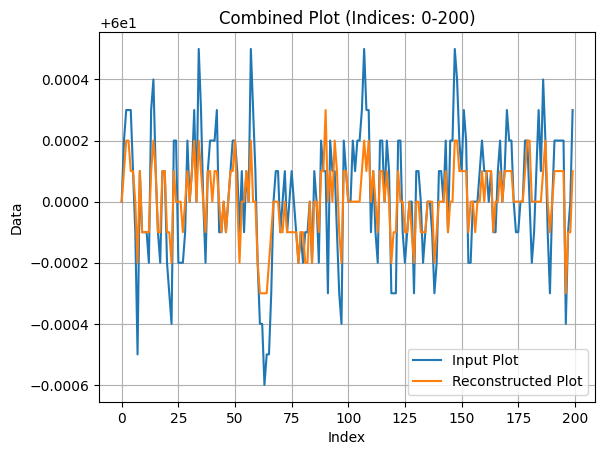

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file and select data points within a specific range
def load_and_select_data(file_path, column_index, start_index, end_index):
    reconstructed_column_data = pd.read_csv(file_path)
    data_from_column = reconstructed_column_data.iloc[:, column_index]
    return data_from_column[start_index:end_index]

# Define file paths
file_path_1 = input_file 
file_path_2 = 'Output.csv'

# Define the range of indices for the data points to be included in the plot
start_index = 0
end_index = 200                         

# Load and select data for the first plot
data_from_second_column_1 = load_and_select_data(file_path_1, 5, start_index, end_index)

# Load and select data for the second plot
data_from_second_column_2 = load_and_select_data(file_path_2, 5, start_index, end_index)

# Plot both sets of data on the same plot
plt.plot(data_from_second_column_1, label='Input Plot')
plt.plot(data_from_second_column_2, label='Reconstructed Plot')
plt.title(f'Combined Plot (Indices: {start_index}-{end_index})')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.legend()  # Add legend to distinguish between the two plots
plt.show()
    

In [ ]:
# Load original data
original_data = pd.read_csv(input_file).values

# Load reconstructed data
reconstructed_data = pd.read_csv("Output.csv").values

# Initialize variable to store total squared error
total_squared_error = 0

# Calculate squared error for each column
for i in range(original_data.shape[1]):
    squared_error = np.sum((original_data[:, i] - reconstructed_data[:, i]) ** 2)
    total_squared_error += squared_error

# Calculate RMSE (square root of average squared error)
rmse = np.sqrt(total_squared_error / (original_data.shape[0] * original_data.shape[1]))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.0029592613976011997
